In [69]:
import os
import sys

In [70]:
os.getcwd()
root_path=os.path.dirname(os.getcwd())
root_path
sys.path.append(root_path)
sys.path

['c:\\Users\\carlo\\OneDrive\\Escritorio\\carlos-curso-thebridge\\carpeta_alumno\\DATA SCIENCE CURSO\\MACHINE LEARNING\\Proyecto_ML\\src\\notebooks',
 'c:\\Users\\carlo\\.vscode\\extensions\\ms-toolsai.jupyter-2021.10.1101450599\\pythonFiles',
 'c:\\Users\\carlo\\.vscode\\extensions\\ms-toolsai.jupyter-2021.10.1101450599\\pythonFiles\\lib\\python',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\python37.zip',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\DLLs',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\lib',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37',
 '',
 'C:\\Users\\carlo\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32',
 'C:\\Users\\carlo\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.functions import replace_string

#### Cargar csv

In [72]:
df1=pd.read_csv("..\\data\\raw\\dft-flights-data-2011-1.csv",encoding="unicode_escape")

#### Inspección del dataframe

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer                 2955 non-null   object
 1   Number of Travellers     2955 non-null   int64 
 2    Total Cost ex VAT       2955 non-null   object
 3   Travel Class             2955 non-null   object
 4   Ticket Single or Return  2955 non-null   object
 5   Travel Date              2955 non-null   object
 6   Journey Start Point      2955 non-null   object
 7   Journey Finish Point     2954 non-null   object
 8   Air Carrier              2955 non-null   object
dtypes: int64(1), object(8)
memory usage: 207.9+ KB


In [74]:
df_group=df1.groupby(by=["Journey Start Point"]).sum()
df_group

,Number of Travellers
Journey Start Point,
AARHUS,3
ABERDEEN,143
ALDERNEY,2
ALICANTE,1
AMSTERDAM,7
...,...
VIGO,3
VILNIUS,1
WARSAW,1


In [75]:
lugares_origen=df_group.sort_values("Number of Travellers",ascending=False)
lugares_origen.rename(columns = {'Number of Travellers': 'Número de Viajeros'}, inplace=True) 

In [76]:
lugares_origen=lugares_origen.rename_axis('index').reset_index()
lugares_origen.rename(columns = {'index': 'Origen'}, inplace=True)
lugares_origen=lugares_origen.head(10)

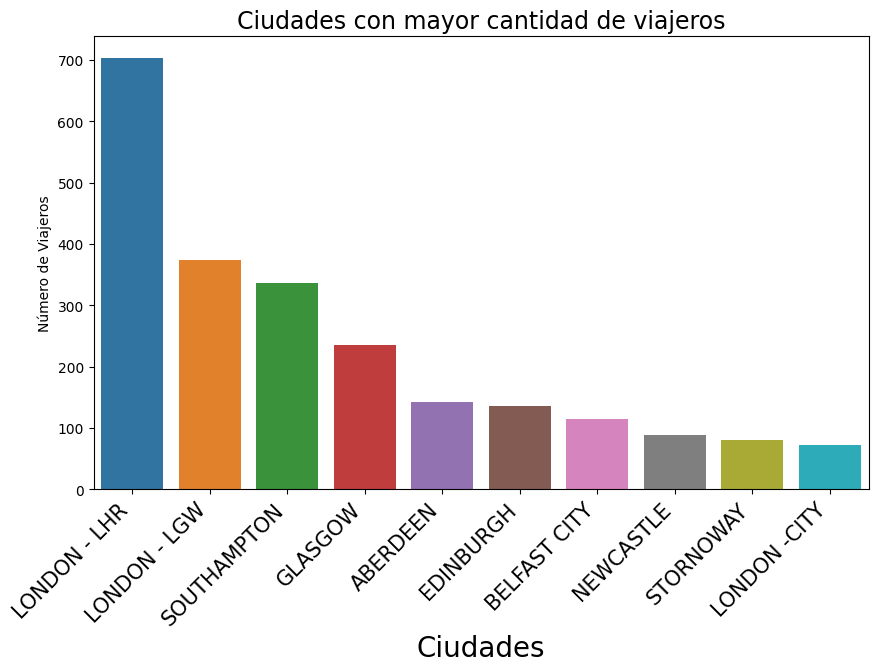

In [77]:
plt.figure(figsize=(10,6), dpi=100)
plt.xticks(rotation=45, fontsize=15, ha='right')
sns.barplot(x = lugares_origen["Origen"], y = lugares_origen["Número de Viajeros"])
plt.xlabel('Ciudades', fontsize=20)
plt.ylabel('Número de Viajeros')
plt.title("Ciudades con mayor cantidad de viajeros", size=17, color="Black");

In [78]:
df_group2=df1.groupby(by=["Journey Finish Point"]).sum()

In [79]:
df_group2

,Number of Travellers
Journey Finish Point,
AALBORG,1
ABERDEEN,170
ADDIS ABABA,4
ALDERNEY,2
ALICANTE,1
...,...
WARSAW,10
WASHINGTON,29
WICK,1


In [80]:
clases=df1.groupby(by=["Travel Class"]).sum()
clases=clases.sort_values("Number of Travellers",ascending=False)
clases.rename(columns = {'Number of Travellers': 'Número de Viajeros'}, inplace=True) 

In [81]:
clases=clases.rename_axis('index').reset_index()
clases.rename(columns = {'index': 'Clase'}, inplace=True)
clases["Tipo de Clase"]=["Económica","Business","Premium Económica","Primera"]
clases.drop("Clase",axis=1,inplace=True)

In [82]:
clases

,Número de Viajeros,Tipo de Clase
0,2465,Económica
1,420,Business
2,61,Premium Económica
3,9,Primera


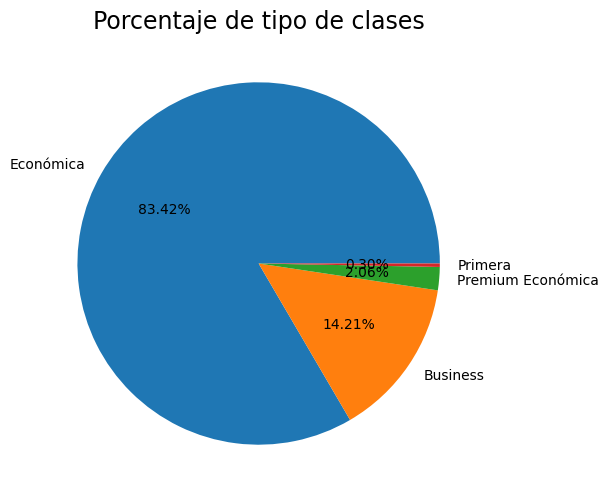

In [83]:
plt.figure(figsize=(10,6), dpi=100)
plt.pie(clases["Número de Viajeros"], labels=clases["Tipo de Clase"],autopct='%1.2f%%')
plt.title("Porcentaje de tipo de clases", size=17, color="black")
plt.show()

#### Borrar columnas que tienen valor único

In [6]:
df1.drop(["Number of Travellers","Customer"],axis=1,inplace=True)

#### Reemplazar string de la columna Total Cost ex VAT

In [85]:
replace_string(df = df1, col= " Total Cost ex VAT ", string_list=[',', '£'], replacement='')

"Ya se han sustituido los siguientes valores [',', '£'] por "

In [86]:
df1[" Total Cost ex VAT "]=df1[" Total Cost ex VAT "].astype("float")

In [87]:
df1[['day', 'month', 'year']] = df1['Travel Date'].str.split('/',expand=True)
df1['year'] = df1['year'].astype(int)
df1['month'] = df1['month'].astype(int)
df1['day'] = df1['day'].astype(int)

In [88]:
df1.drop("Travel Date", axis=1,inplace=True)

#### Transformación de variables categóricas a numéricas

In [89]:
df1=df1.replace("ECONOMY",0)
df1=df1.replace('PREMIUM ECONOMY',1)
df1=df1.replace('BUSINESS',2)
df1=df1.replace('FIRST',3)

#### Label Encoder

In [91]:
from sklearn import preprocessing
le_df1=preprocessing.LabelEncoder()
le_df1.fit(df1["Journey Finish Point"])
df1["Journey Finish Point_le"]=le_df1.transform(df1["Journey Finish Point"])

In [92]:
le2_df1=preprocessing.LabelEncoder()
le2_df1.fit(df1["Journey Start Point"])
df1["Journey Start Point_le"]=le2_df1.transform(df1["Journey Start Point"])

In [93]:
le3_df1=preprocessing.LabelEncoder()
le3_df1.fit(df1["Air Carrier"])
df1["Air Carrier_le"]=le3_df1.transform(df1["Air Carrier"])

In [94]:
df1

,Customer,Number of Travellers,Total Cost ex VAT,Travel Class,Ticket Single or Return,Journey Start Point,Journey Finish Point,Air Carrier,day,month,year,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
0,Department for Transport,1,81.52,0,Return,GLASGOW,LONDON - LGW,FLYBE,10,2,2011,109,39,32
1,Department for Transport,1,217.14,0,Return,LONDON - LGW,MARRAKECH,EASYJET,29,3,2011,122,58,28
2,Department for Transport,1,7969.20,2,Return,LONDON - LHR,SINGAPORE,BRITISH AIRWAYS,7,4,2011,166,59,17
3,Department for Transport,1,272.82,2,Return,LONDON - LGW,EDINBURGH,BRITISH AIRWAYS,7,4,2011,66,58,17
4,Department for Transport,1,7969.20,2,Return,LONDON - LHR,SINGAPORE,BRITISH AIRWAYS,7,4,2011,166,59,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,Vehicle Certification Agency,1,71.49,0,Single,BELFAST CITY,BRISTOL,FLYBE,18,11,2011,31,9,32
2951,Vehicle Certification Agency,1,31.94,0,Single,BRISTOL,BELFAST INTL,EASYJET,18,11,2011,19,16,28
2952,Vehicle Certification Agency,1,267.40,0,Return,LAS PALMAS,LONDON - LHR,IBERIA,22,11,2011,110,53,35
2953,Vehicle Certification Agency,1,215.10,0,Return,LAS PALMAS,MADRID,IBERIA,29,11,2011,117,53,35


In [95]:
df1.drop(["Ticket Single or Return","Journey Start Point","Journey Finish Point","Air Carrier"],axis=1,inplace=True)

<AxesSubplot:>

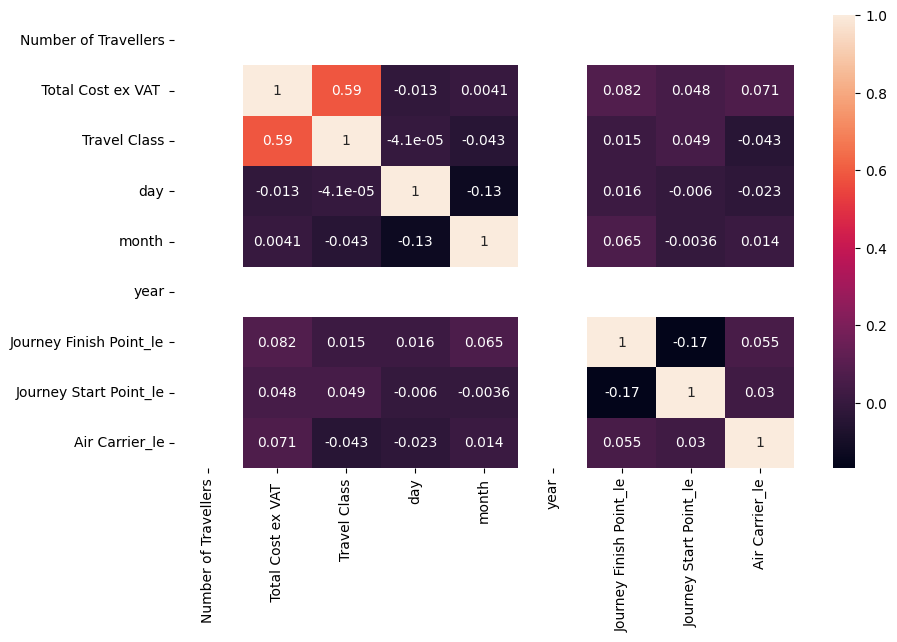

In [96]:
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(df1.corr(),annot=True)
#Alta correlación entre el precio del billete y el tipo de clase.

C:\Users\carlo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\carlo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


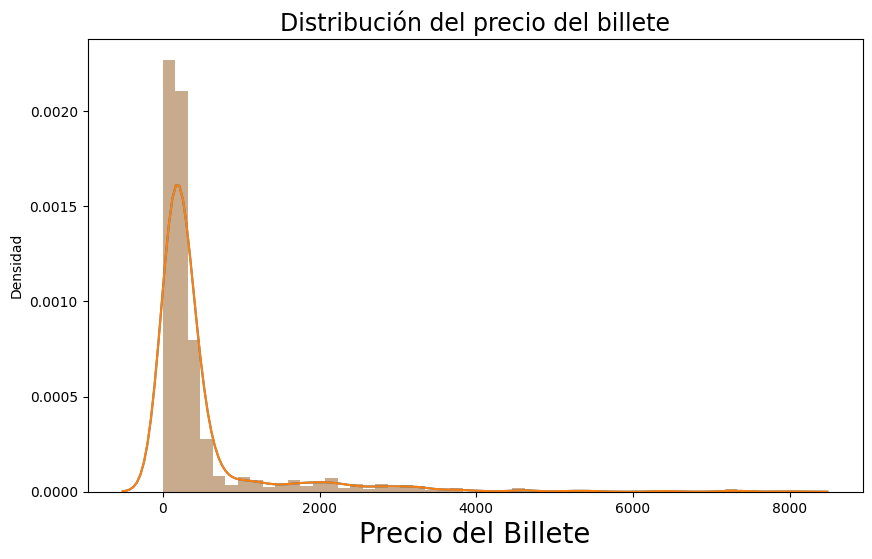

In [97]:
plt.figure(figsize=(10,6), dpi=100)
fig_sin_log=sns.distplot(df1[" Total Cost ex VAT "]);
fig1=sns.distplot(df1[" Total Cost ex VAT "])
plt.xlabel('Precio del Billete', fontsize=20)
plt.ylabel('Densidad')
plt.title("Distribución del precio del billete", size=17, color="Black");

In [102]:
df1.drop(["Customer"],axis=1,inplace=True)

In [123]:
df1

,Number of Travellers,Total Cost ex VAT,Travel Class,day,month,year,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
0,1,81.52,0,10,2,2011,109,39,32
1,1,217.14,0,29,3,2011,122,58,28
2,1,7969.20,2,7,4,2011,166,59,17
3,1,272.82,2,7,4,2011,66,58,17
4,1,7969.20,2,7,4,2011,166,59,17
...,...,...,...,...,...,...,...,...,...
2950,1,71.49,0,18,11,2011,31,9,32
2951,1,31.94,0,18,11,2011,19,16,28
2952,1,267.40,0,22,11,2011,110,53,35
2953,1,215.10,0,29,11,2011,117,53,35


#### Aplicar logaritmo a los valores del dataframe para mejorar la simetría en la distribución.

In [103]:
df1_log=np.log(df1+1)

C:\Users\carlo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


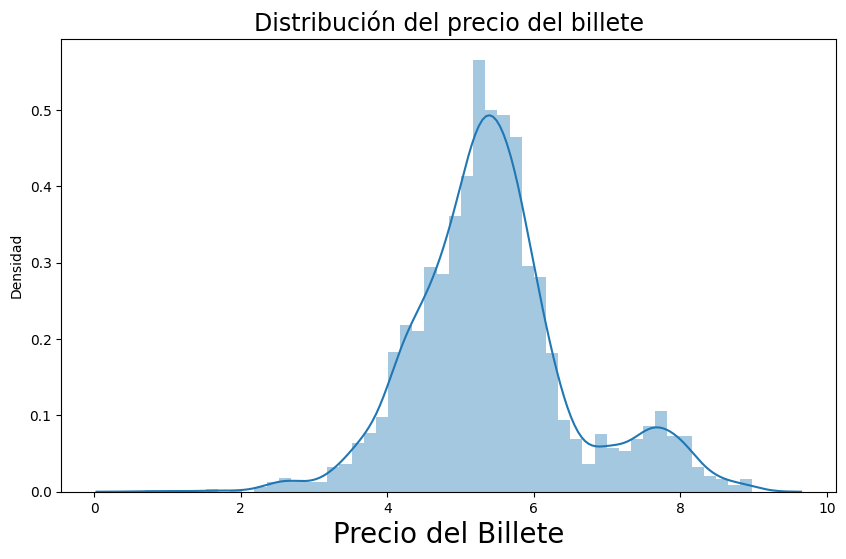

In [104]:
plt.figure(figsize=(10,6), dpi=100)
fig1=sns.distplot(df1_log[" Total Cost ex VAT "])
plt.xlabel('Precio del Billete', fontsize=20)
plt.ylabel('Densidad')
plt.title("Distribución del precio del billete", size=17, color="Black");

#### Establecer "X" y "y"

In [105]:
X=df1_log.drop(" Total Cost ex VAT ",axis=1)
y=df1_log[" Total Cost ex VAT "]

#### Train test split

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.20, random_state = 42)

#### Escalado de datos

In [107]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scal = std_scale.transform(X_train)
X_test_scal = std_scale.transform(X_test)

#### Gridsearch con modelo de Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [10, 100, 1000],
    "max_features": [1,2,3], "max_depth": [50,100,150,200]}

rnd_reg_grid = RandomForestRegressor(random_state=42)

m1 = GridSearchCV(estimator = rnd_reg_grid,
                  param_grid = parameters,
                  n_jobs = -1, cv=10)

m1.fit(X_train_scal, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, 200],
                         'max_features': [1, 2, 3],
                         'n_estimators': [10, 100, 1000]})

In [109]:
print(m1.best_estimator_)
print(m1.best_score_)
print(m1.best_params_)

RandomForestRegressor(max_depth=50, max_features=2, n_estimators=1000,
                      random_state=42)
0.6210847663073643
{'max_depth': 50, 'max_features': 2, 'n_estimators': 1000}


In [110]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, m1.predict(X_test_scal)))
print('MSE:', metrics.mean_squared_error(y_test, m1.predict(X_test_scal)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,m1.predict(X_test_scal))))
print("R2 score:", r2_score(y_test,m1.predict(X_test_scal)))

MAE: 0.4705768165580466
MSE: 0.5062617154671268
RMSE: 0.711520706281361
R2 score: 0.586378284528785


In [113]:
rg=RandomForestRegressor(random_state=42,max_depth=50,max_features=2,n_estimators=1000)
rg.fit(X_train_scal,y_train)
print('MAE:', metrics.mean_absolute_error(y_test, rg.predict(X_test_scal)))
print('MSE:', metrics.mean_squared_error(y_test, rg.predict(X_test_scal)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rg.predict(X_test_scal))))
print("R2 score:", r2_score(y_test,rg.predict(X_test_scal)))

MAE: 0.4705768165580466
MSE: 0.5062617154671268
RMSE: 0.711520706281361
R2 score: 0.586378284528785


In [114]:
rg.feature_importances_

array([0.        , 0.27913656, 0.14990536, 0.09325964, 0.        ,
       0.1902415 , 0.14536148, 0.14209546])

In [115]:
X_train

,Number of Travellers,Travel Class,day,month,year,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
1364,0.693147,0.000000,2.302585,1.791759,7.606885,4.356709,4.564348,3.496508
1735,0.693147,0.000000,3.135494,1.945910,7.606885,1.945910,4.605170,3.737670
879,0.693147,0.000000,3.401197,2.302585,7.606885,3.637586,4.094345,2.944439
2325,0.693147,0.000000,3.135494,2.302585,7.606885,0.693147,4.564348,3.332205
2863,0.693147,0.000000,2.944439,1.945910,7.606885,4.189655,4.682131,4.007333
...,...,...,...,...,...,...,...,...
1638,0.693147,0.000000,2.197225,1.945910,7.606885,0.693147,2.302585,3.496508
1095,0.693147,0.000000,3.465736,2.397895,7.606885,4.867534,4.094345,2.890372
1130,0.693147,0.000000,1.609438,2.484907,7.606885,4.574711,4.189655,3.496508
1294,0.693147,1.098612,3.091042,1.609438,7.606885,5.198497,4.615121,3.583519


In [116]:
dict1={"features": ["Número de Viajeros","Clase",	"Día","Mes","Año","Destino","Origen","Aerolínea"],'importances': rg.feature_importances_}

In [117]:
df_features=pd.DataFrame(dict1).sort_values('importances', ascending=False)

In [118]:
df_features.rename(columns={"features":"Variable","importances":"Importancia"},inplace=True)

In [119]:
df_features

,Variable,Importancia
1,Clase,0.279137
5,Destino,0.190242
2,Día,0.149905
6,Origen,0.145361
7,Aerolínea,0.142095
3,Mes,0.093260
0,Número de Viajeros,0.000000
4,Año,0.000000


In [120]:
barra1 = np.array(df_features["Importancia"])
barra2 = np.array(df_features["Variable"])

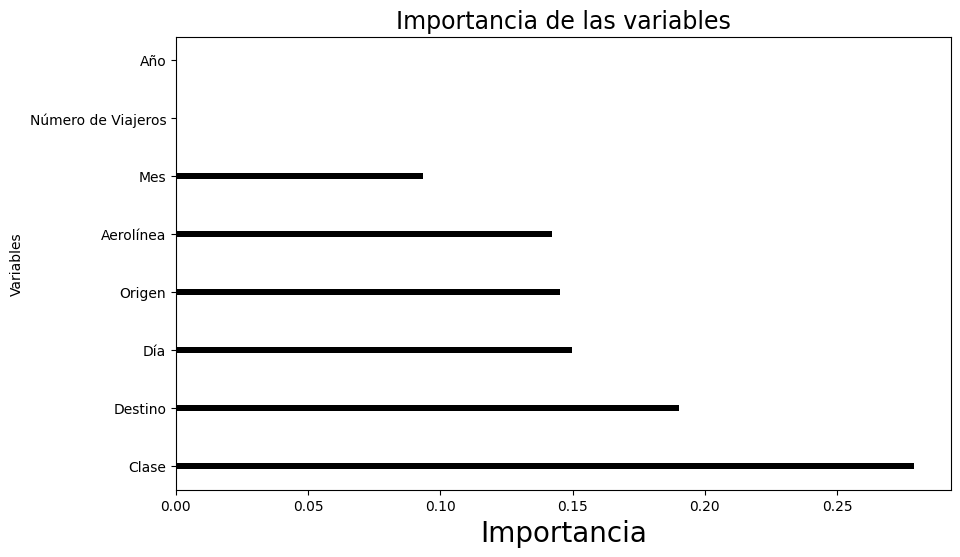

In [121]:
plt.figure(figsize=(10,6), dpi=100)
plt.barh(barra2, barra1, height = 0.1,color="black")
plt.xlabel('Importancia', fontsize=20)
plt.ylabel('Variables')
plt.title("Importancia de las variables", size=17, color="Black");
plt.show()

#### Gridsearch con modelo XGBoost

In [102]:
import xgboost
#Con max_depth me bajaba el score
parameters = {"learnig_rate": [0.1, 0.3, 0.5, 0.7,0.9], "n_estimators": [10, 100, 1000],
            "max_depth": np.arange(1,30)}
xgb_reg_grid = xgboost.XGBRegressor(random_state=42)

m2 = GridSearchCV(estimator = xgb_reg_grid,
                  param_grid = parameters,
                  n_jobs = -1, cv=10)

m2.fit(X_train_scal, y_train)

[23:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "learnig_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
  

In [103]:
import xgboost
#Con max_depth me bajaba el score
parameters = {"max_depth":[6],"eta":[0.075],"min_child_weight":[1],
                "subsample":[1.0],"explain_level":[2],"random_state":[42]}
xgb_reg_grid = xgboost.XGBRegressor(random_state=42)

m22 = GridSearchCV(estimator = xgb_reg_grid,
                  param_grid = parameters,
                  n_jobs = -1, cv=10)

m22.fit(X_train_scal, y_train)

[23:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "explain_level" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
        

In [104]:
print(m2.best_estimator_)
print(m2.best_score_)
print(m2.best_params_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learnig_rate=0.1,
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)
0.6199606282101243
{'learnig_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [106]:
pred2 = m2.predict(X_test_scal)
r2_score(y_test, pred2)

0.5909001107061915

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred2)))
print("R2 score:", r2_score(y_test,pred2))

MAE: 0.47333367226255474
MSE: 0.5007271233700703
RMSE: 0.707620748261433
R2 score: 0.5909001107061915


#### Gridsearch con modelo Ada Boost Regressor

In [113]:
from sklearn.ensemble import AdaBoostRegressor
parameters = {"n_estimators": [50, 80,100, 150,200],"loss": ["linear", "square", "exponential"]}
ada_reg_grid = AdaBoostRegressor(random_state=42) 

m3 = GridSearchCV(estimator = ada_reg_grid,
                  param_grid = parameters,
                  n_jobs = -1, cv=10)

m3.fit(X_train_scal, y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 80, 100, 150, 200]})

In [114]:
print(m3.best_estimator_)
print(m3.best_score_)
print(m3.best_params_)

AdaBoostRegressor(random_state=42)
0.36214286827831677
{'loss': 'linear', 'n_estimators': 50}


In [115]:
print('MAE:', metrics.mean_absolute_error(y_test, m3.predict(X_test_scal)))
print('MSE:', metrics.mean_squared_error(y_test, m3.predict(X_test_scal)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,m3.predict(X_test_scal))))
print("R2 score:", r2_score(y_test,m3.predict(X_test_scal)))

MAE: 0.7056242569251362
MSE: 0.7803181398451802
RMSE: 0.8833561794911383
R2 score: 0.36247099522770776


#### Modelo polinómico

In [163]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 2)
#Ajustar a nuestros datos, aquí no estamos entrenando nada
poly_feats.fit(X_train_scal)
X_poly_train = poly_feats.transform(X_train_scal)
from sklearn.linear_model import LinearRegression
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)
X_poly_test = poly_feats.transform(X_test_scal)
predictions_dos = pol_reg.predict(X_poly_test)

In [164]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_dos))
print('MSE:', metrics.mean_squared_error(y_test, predictions_dos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_dos)))
print("R2 score:", r2_score(y_test,predictions_dos))

MAE: 0.6808279541505309
MSE: 0.8009124036771923
RMSE: 0.8949370948157152
R2 score: 0.3456452419170828


#### Modelo Gradient Boosting Regressor

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train_scal, y_train)

GradientBoostingRegressor()

In [128]:
print('MAE:', metrics.mean_absolute_error(y_test, gbr.predict(X_test_scal)))
print('MSE:', metrics.mean_squared_error(y_test, gbr.predict(X_test_scal)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr.predict(X_test_scal))))
print("R2 score:", r2_score(y_test,gbr.predict(X_test_scal)))

MAE: 0.5492095462129278
MSE: 0.5812564515331319
RMSE: 0.7624017651692131
R2 score: 0.5251067120688562


#### Modelo de Regresión Lineal

In [160]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scal, y_train)
print('MAE:', metrics.mean_absolute_error(y_test,lm.predict(X_test_scal)))
print('MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test_scal)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test_scal))))
print("R2 score:", r2_score(y_test,lm.predict(X_test_scal)))

MAE: 0.7251154613254811
MSE: 0.8895744730107603
RMSE: 0.9431725573884984
R2 score: 0.27320729906149765


C:\Users\carlo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


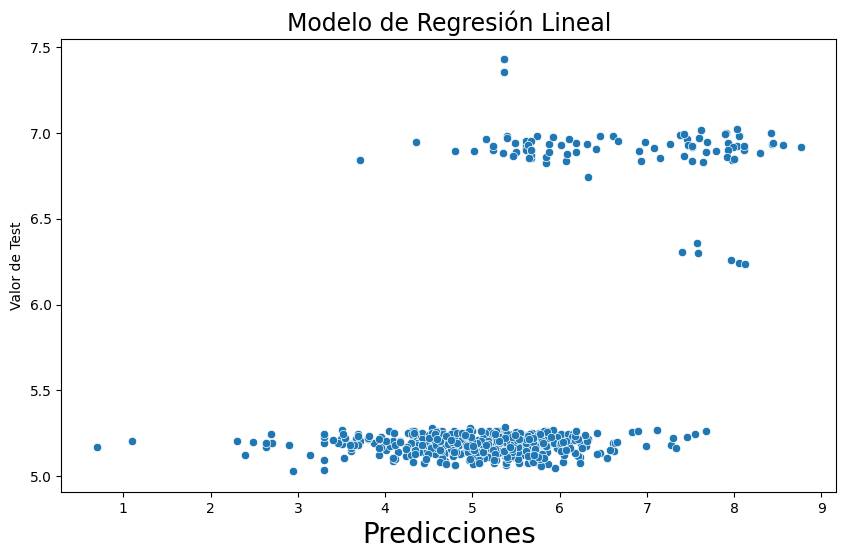

In [162]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(y_test, lm.predict(X_test_scal));
plt.xlabel('Predicciones', fontsize=20)
plt.ylabel('Valor de Test')
plt.title("Modelo de Regresión Lineal", size=17, color="Black");
plt.show()

In [124]:
df1

,Number of Travellers,Total Cost ex VAT,Travel Class,day,month,year,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
0,1,81.52,0,10,2,2011,109,39,32
1,1,217.14,0,29,3,2011,122,58,28
2,1,7969.20,2,7,4,2011,166,59,17
3,1,272.82,2,7,4,2011,66,58,17
4,1,7969.20,2,7,4,2011,166,59,17
...,...,...,...,...,...,...,...,...,...
2950,1,71.49,0,18,11,2011,31,9,32
2951,1,31.94,0,18,11,2011,19,16,28
2952,1,267.40,0,22,11,2011,110,53,35
2953,1,215.10,0,29,11,2011,117,53,35


#### Borrar columnas number of travellers y year, que tienen valores únicos.

In [149]:
df2

,Total Cost ex VAT,Travel Class,day,month,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
0,81.52,0,10,2,109,39,32
1,217.14,0,29,3,122,58,28
2,7969.20,2,7,4,166,59,17
3,272.82,2,7,4,66,58,17
4,7969.20,2,7,4,166,59,17
...,...,...,...,...,...,...,...
2950,71.49,0,18,11,31,9,32
2951,31.94,0,18,11,19,16,28
2952,267.40,0,22,11,110,53,35
2953,215.10,0,29,11,117,53,35


#### Guardar csv limpio, elegido para el modelo.

In [175]:
df2

,Total Cost ex VAT,Travel Class,day,month,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
0,81.52,0,10,2,109,39,32
1,217.14,0,29,3,122,58,28
2,7969.20,2,7,4,166,59,17
3,272.82,2,7,4,66,58,17
4,7969.20,2,7,4,166,59,17
...,...,...,...,...,...,...,...
2950,71.49,0,18,11,31,9,32
2951,31.94,0,18,11,19,16,28
2952,267.40,0,22,11,110,53,35
2953,215.10,0,29,11,117,53,35


In [199]:
df_procesado = pd.read_csv('..\\data\\processed\\dataframe_limpio.csv')
df_procesado

,Unnamed: 0,Total Cost ex VAT,Travel Class,day,month,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
0,0,81.52,0,10,2,109,39,32
1,1,217.14,0,29,3,122,58,28
2,2,7969.20,2,7,4,166,59,17
3,3,272.82,2,7,4,66,58,17
4,4,7969.20,2,7,4,166,59,17
...,...,...,...,...,...,...,...,...
2950,2950,71.49,0,18,11,31,9,32
2951,2951,31.94,0,18,11,19,16,28
2952,2952,267.40,0,22,11,110,53,35
2953,2953,215.10,0,29,11,117,53,35


In [152]:
df2.to_csv("..\\data\\processed\\dataframe_limpio.csv")

In [125]:
#Borrar columnas month y year, que tienen correlacionas bajas con el target
df2=df1.drop(["Number of Travellers","year"],axis=1)

In [126]:
df2_log=np.log(df2+1)

In [130]:
X2=df2_log.drop(" Total Cost ex VAT ",axis=1)
y2=df2_log[" Total Cost ex VAT "]
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test =  train_test_split(X2, y2, test_size = 0.20, random_state = 42)

In [131]:
from sklearn import preprocessing
std_scale2 = preprocessing.StandardScaler().fit(X2_train)
X2_train_scal = std_scale2.transform(X2_train)
X2_test_scal = std_scale2.transform(X2_test)

In [132]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [10, 100, 1000],
    "max_features": [1,2,3], "max_depth": [50,100,150,200]}

rnd_reg_grid2 = RandomForestRegressor(random_state=42)

m4 = GridSearchCV(estimator = rnd_reg_grid2,
                  param_grid = parameters,
                  n_jobs = -1, cv=10)

m4.fit(X2_train_scal, y2_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, 200],
                         'max_features': [1, 2, 3],
                         'n_estimators': [10, 100, 1000]})

In [133]:
print(m4.best_estimator_)
print(m4.best_score_)
print(m4.best_params_)

RandomForestRegressor(max_depth=50, max_features=2, n_estimators=1000,
                      random_state=42)
0.6207151287822542
{'max_depth': 50, 'max_features': 2, 'n_estimators': 1000}


In [179]:
print('MAE:', metrics.mean_absolute_error(y2_test, m4.predict(X2_test_scal)))
print('MSE:', metrics.mean_squared_error(y2_test, m4.predict(X2_test_scal)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test,m4.predict(X2_test_scal))))
print("R2 score:", r2_score(y2_test,m4.predict(X2_test_scal)))

MAE: 0.46907967737065354
MSE: 0.5090198892372932
RMSE: 0.7134562980570661
R2 score: 0.5841248244477057


In [135]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42,max_depth=50,n_estimators=1000)


forest.fit(X2_train_scal, y2_train)

RandomForestRegressor(max_depth=50, n_estimators=1000, random_state=42)

In [186]:
X2_train_scal

array([[-0.44272306, -0.49130164, -1.27825591,  0.10620049,  0.82993009,
         0.4712453 ],
       [-0.44272306,  0.73336865, -0.69675388, -1.93258089,  0.8756597 ,
         0.95080641],
       [-0.44272306,  1.12404605,  0.64872968, -0.50195228,  0.30342262,
        -0.62656678],
       ...,
       [-0.44272306, -1.51047256,  1.33650061,  0.2905621 ,  0.41019099,
         0.4712453 ],
       [ 2.33876611,  0.66800887, -1.96602684,  0.81808993,  0.88680626,
         0.64427116],
       [-0.44272306,  1.07419881,  0.64872968,  0.82274937, -0.1507875 ,
         0.4712453 ]])

In [136]:
from sklearn import metrics
from sklearn.metrics import r2_score
pred = forest.predict(X2_test_scal)
r2_score(y2_test, pred)

0.5670106171681222

In [137]:
forest.feature_importances_

array([0.35446696, 0.13416868, 0.09000826, 0.18310386, 0.11852294,
       0.1197293 ])

In [ ]:
df['dlog'] = np.log(df.columnx).diff(

In [201]:
prueba_prediccion=pd.DataFrame({"Travel Class":[0],"day":[29],"month":[3],"Journey Finish Point_le":[122],"Journey Start Point_le": [58],	"Air Carrier_le":[28]})
prueba_prediccion_log=np.log(prueba_prediccion+1)
print("Predicciones",forest.predict(prueba_prediccion_log))


print("prediccion_real", np.exp(forest.predict(prueba_prediccion_log)))

Predicciones [4.92317264]
prediccion_real [137.43796331]


C:\Users\carlo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:435: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\carlo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:435: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [196]:
from sklearn import preprocessing
std_scale4 = preprocessing.StandardScaler().fit(prueba_prediccion_log)
X2_train_scal4 = std_scale4.transform(prueba_prediccion_log)


In [195]:
prueba_prediccion_log

,Travel Class,day,month,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
0,0.0,3.401197,1.386294,4.812184,4.077537,3.367296


In [154]:
dict1={"features": ["Clase",	"Día","Mes","Destino","Origen","Aerolínea"],'importances': forest.feature_importances_}

In [155]:
df_features=pd.DataFrame(dict1).sort_values('importances', ascending=False)
df_features.rename(columns={"features":"Variable","importances":"Importancia"},inplace=True)
barra1 = np.array(df_features["Importancia"])
barra2 = np.array(df_features["Variable"])

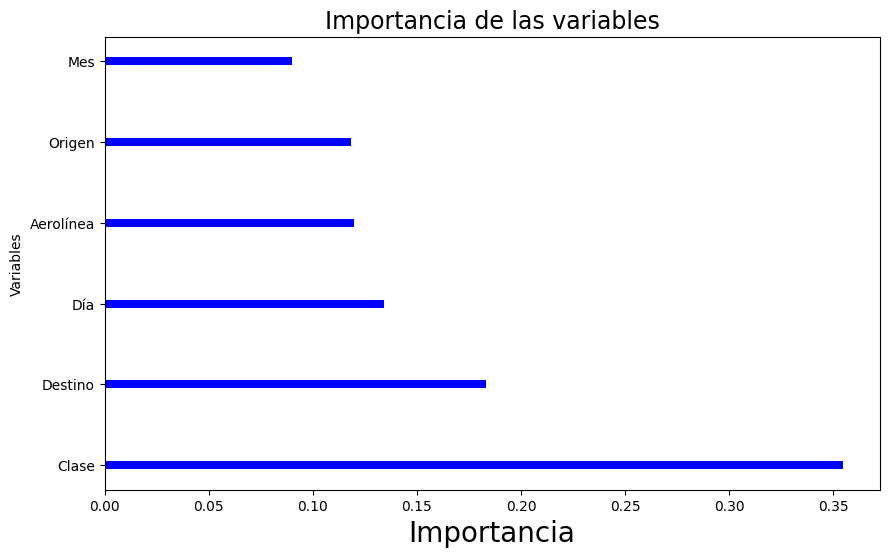

In [159]:
plt.figure(figsize=(10,6), dpi=100)
plt.barh(barra2, barra1, height = 0.1,color="blue")
plt.xlabel('Importancia', fontsize=20)
plt.ylabel('Variables')
plt.title("Importancia de las variables", size=17, color="Black");
plt.show()

In [66]:
import xgboost
parameters = {"learnig_rate": [0.1, 0.3, 0.5, 0.7,0.9], "n_estimators": [10, 100, 1000],
            "max_depth": np.arange(1,30)}
xgb_reg_grid2 = xgboost.XGBRegressor(random_state=42)

m5 = GridSearchCV(estimator = xgb_reg_grid2,
                  param_grid = parameters,
                  n_jobs = -1, cv=10)

m5.fit(X2_train_scal, y2_train)

[22:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "learnig_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
  

In [67]:
print(m5.best_estimator_)
print(m5.best_score_)
print(m5.best_params_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learnig_rate=0.1,
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)
0.6144526774088763
{'learnig_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


<AxesSubplot:>

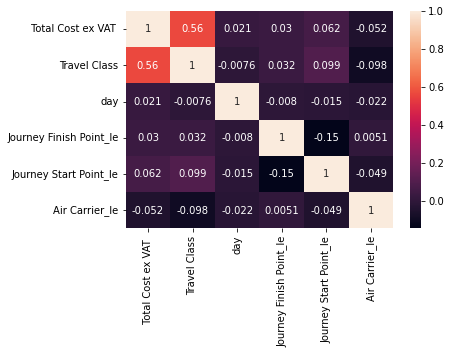

In [34]:
sns.heatmap(df2_log.corr(),annot=True)

In [147]:
df_yearday_log

,Total Cost ex VAT,Travel Class,day,year,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le,day/year
0,4.413041,0.000000,2.397895,7.606885,4.700480,3.688879,3.496508,4.262680
1,5.385137,0.000000,3.401197,7.606885,4.812184,4.077537,3.367296,4.787492
2,8.983465,1.098612,2.079442,7.606885,5.117994,4.094345,2.890372,4.852030
3,5.612471,1.098612,2.079442,7.606885,4.204693,4.077537,2.890372,4.852030
4,8.983465,1.098612,2.079442,7.606885,5.117994,4.094345,2.890372,4.852030
...,...,...,...,...,...,...,...,...
2950,4.283449,0.000000,2.944439,7.606885,3.465736,2.302585,3.496508,5.855072
2951,3.494688,0.000000,2.944439,7.606885,2.995732,2.833213,3.367296,5.855072
2952,5.592478,0.000000,3.135494,7.606885,4.709530,3.988984,3.583519,5.866468
2953,5.375741,0.000000,3.401197,7.606885,4.770685,3.988984,3.583519,5.886104


In [50]:
df3_log=df2_log.drop(["day"],axis=1)

In [51]:
X22=df2_log.drop(" Total Cost ex VAT ",axis=1)
y22=df2_log[" Total Cost ex VAT "]
from sklearn.model_selection import train_test_split
X22_train, X22_test, y22_train, y22_test =  train_test_split(X22, y22, test_size = 0.20, random_state = 42)

In [52]:
from sklearn import preprocessing
std_scale22 = preprocessing.StandardScaler().fit(X22_train)
X22_train_scal = std_scale22.transform(X22_train)
X22_test_scal = std_scale22.transform(X22_test)

In [53]:
import xgboost
from sklearn.metrics import r2_score
xgb_reg = xgboost.XGBRegressor(max_depth=4,n_estimators=100,random_state=42)

xgb_reg.fit(X22_train_scal, y22_train)
y_pred = xgb_reg.predict(X22_test_scal)
r2_score(y22_test, y_pred) 

0.5787566941501303

In [45]:
df3_log

,Total Cost ex VAT,Travel Class,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
0,4.413041,0.000000,4.700480,3.688879,3.496508
1,5.385137,0.000000,4.812184,4.077537,3.367296
2,8.983465,1.098612,5.117994,4.094345,2.890372
3,5.612471,1.098612,4.204693,4.077537,2.890372
4,8.983465,1.098612,5.117994,4.094345,2.890372
...,...,...,...,...,...
2950,4.283449,0.000000,3.465736,2.302585,3.496508
2951,3.494688,0.000000,2.995732,2.833213,3.367296
2952,5.592478,0.000000,4.709530,3.988984,3.583519
2953,5.375741,0.000000,4.770685,3.988984,3.583519


In [46]:
df4_log=df3_log.drop(["Journey Finish Point_le","Journey Start Point_le","Air Carrier_le"],axis=1)

In [47]:
X4=df4_log.drop(" Total Cost ex VAT ",axis=1)
y4=df4_log[" Total Cost ex VAT "]
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test =  train_test_split(X4, y4, test_size = 0.20, random_state = 42)

In [48]:
from sklearn import preprocessing
std_scale4 = preprocessing.StandardScaler().fit(X4_train)
X4_train_scal = std_scale4.transform(X4_train)
X4_test_scal = std_scale4.transform(X4_test)

In [49]:
import xgboost
from sklearn.metrics import r2_score
xgb_reg = xgboost.XGBRegressor(max_depth=4,n_estimators=100,random_state=42)

xgb_reg.fit(X4_train_scal, y4_train)
y_pred4 = xgb_reg.predict(X4_test_scal)
r2_score(y4_test, y_pred4)

0.30332953099440063

In [37]:
df1["day/year"]=(df1["month"]*30) + df1["day"]

<AxesSubplot:>

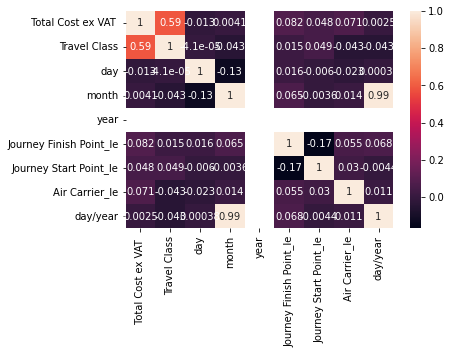

In [39]:
sns.heatmap(df1.corr(),annot=True)

In [41]:
df_yearday=df1.drop(["month"],axis=1)

In [45]:
df_yearday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Total Cost ex VAT       2955 non-null   float64
 1   Travel Class             2955 non-null   int64  
 2   day                      2955 non-null   int32  
 3   year                     2955 non-null   int32  
 4   Journey Finish Point_le  2955 non-null   int32  
 5   Journey Start Point_le   2955 non-null   int32  
 6   Air Carrier_le           2955 non-null   int32  
 7   day/year                 2955 non-null   int32  
dtypes: float64(1), int32(6), int64(1)
memory usage: 115.6 KB


C:\Users\carlo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\carlo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


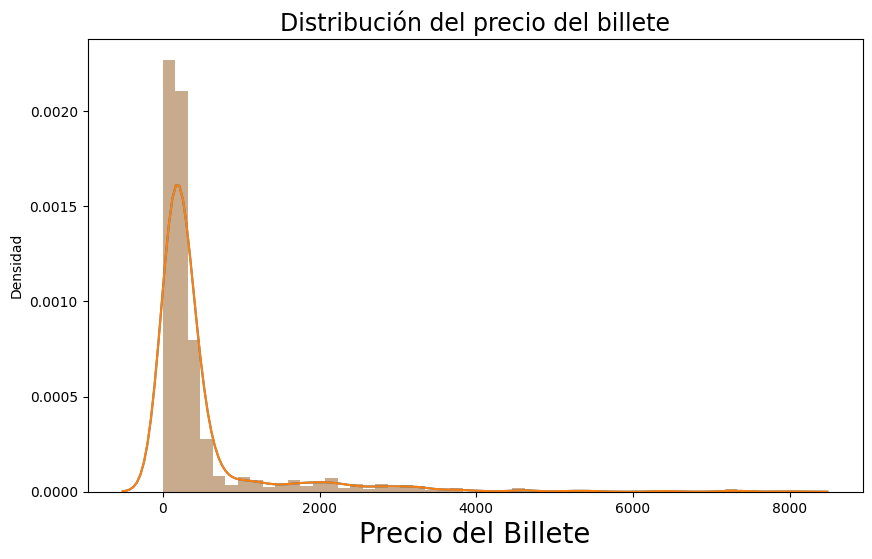

In [51]:
plt.figure(figsize=(10,6), dpi=100)
fig_sin_log=sns.distplot(df_yearday[" Total Cost ex VAT "]);
fig1=sns.distplot(df1[" Total Cost ex VAT "])
plt.xlabel('Precio del Billete', fontsize=20)
plt.ylabel('Densidad')
plt.title("Distribución del precio del billete", size=17, color="Black");

In [52]:
df_yearday_log=np.log(df_yearday+1)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.20, random_state = 42)

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [10, 100, 1000],
    "max_features": [1,2,3], "max_depth": [50,100,150,200]}

rnd_reg_grid = RandomForestRegressor(random_state=42)

m1 = GridSearchCV(estimator = rnd_reg_grid,
                  param_grid = parameters,
                  n_jobs = -1, cv=10)

m1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, 200],
                         'max_features': [1, 2, 3],
                         'n_estimators': [10, 100, 1000]})

In [55]:
print(m1.best_estimator_)
print(m1.best_score_)
print(m1.best_params_)

RandomForestRegressor(max_depth=50, max_features=2, n_estimators=1000,
                      random_state=42)
0.6211855647785237
{'max_depth': 50, 'max_features': 2, 'n_estimators': 1000}


In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, m1.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test,m1.predict(X_test) ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,m1.predict(X_test))))

MAE: 0.4699795234584668
MSE: 0.507625981108781
RMSE: 0.712478758356192


In [61]:
print("R2 score:", r2_score(y_test,m1.predict(X_test)))

R2 score: 0.5852636636166769


In [63]:
df_yearday_log_2=df_yearday_log.drop(["day","year"],axis=1)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.20, random_state = 42)

In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [10, 100, 1000],
    "max_features": [1,2,3], "max_depth": [50,100,150,200]}

rnd_reg_grid = RandomForestRegressor(random_state=42)

m1 = GridSearchCV(estimator = rnd_reg_grid,
                  param_grid = parameters,
                  n_jobs = -1, cv=10)

m1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, 200],
                         'max_features': [1, 2, 3],
                         'n_estimators': [10, 100, 1000]})

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, m1.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test,m1.predict(X_test) ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,m1.predict(X_test))))
print("R2 score:", r2_score(y_test,m1.predict(X_test)))

MAE: 0.4699795234584668
MSE: 0.507625981108781
RMSE: 0.712478758356192
R2 score: 0.5852636636166769


In [66]:
print(m1.best_estimator_)
print(m1.best_score_)
print(m1.best_params_)

RandomForestRegressor(max_depth=50, max_features=2, n_estimators=1000,
                      random_state=42)
0.6211855647785237
{'max_depth': 50, 'max_features': 2, 'n_estimators': 1000}


### Trabajamos el csv como un datetime y vemos que no hay relación entre el coste del billete
### y la fecha del vuelo.

In [55]:
df_time=pd.read_csv("..\\data\\raw\\dft-flights-data-2011-1.csv",encoding="unicode_escape")

In [56]:
df_time.drop(["Number of Travellers","Customer"],axis=1,inplace=True)
replace_string(df = df_time, col= " Total Cost ex VAT ", string_list=[',', '£'], replacement='')
df_time[" Total Cost ex VAT "]=df_time[" Total Cost ex VAT "].astype("float")

In [57]:
df_time['new_date'] = pd.to_datetime(df_time["Travel Date"])

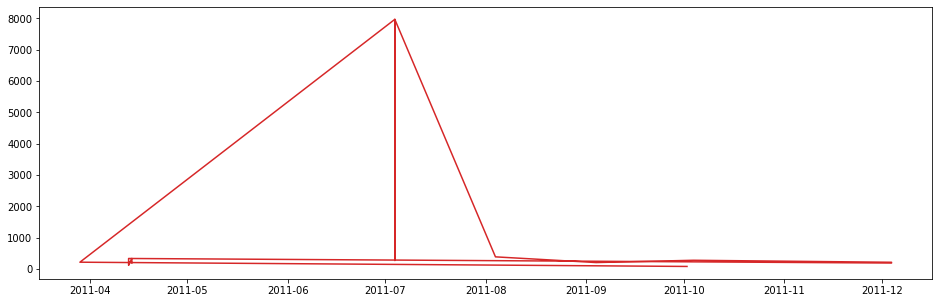

In [58]:
plt.figure(figsize=(16,5))
plt.plot(df_time["new_date"].head(20), df_time[" Total Cost ex VAT "].head(20), color='tab:red')

In [99]:
df_time

,Total Cost ex VAT,Travel Class,Ticket Single or Return,Travel Date,Journey Start Point,Journey Finish Point,Air Carrier,new_date
0,81.52,ECONOMY,Return,10/2/2011,GLASGOW,LONDON - LGW,FLYBE,2011-10-02
1,217.14,ECONOMY,Return,29/3/2011,LONDON - LGW,MARRAKECH,EASYJET,2011-03-29
2,7969.20,BUSINESS,Return,7/4/2011,LONDON - LHR,SINGAPORE,BRITISH AIRWAYS,2011-07-04
3,272.82,BUSINESS,Return,7/4/2011,LONDON - LGW,EDINBURGH,BRITISH AIRWAYS,2011-07-04
4,7969.20,BUSINESS,Return,7/4/2011,LONDON - LHR,SINGAPORE,BRITISH AIRWAYS,2011-07-04
...,...,...,...,...,...,...,...,...
2950,71.49,ECONOMY,Single,18/11/2011,BELFAST CITY,BRISTOL,FLYBE,2011-11-18
2951,31.94,ECONOMY,Single,18/11/2011,BRISTOL,BELFAST INTL,EASYJET,2011-11-18
2952,267.40,ECONOMY,Return,22/11/2011,LAS PALMAS,LONDON - LHR,IBERIA,2011-11-22
2953,215.10,ECONOMY,Return,29/11/2011,LAS PALMAS,MADRID,IBERIA,2011-11-29


In [183]:
df2

,Total Cost ex VAT,Travel Class,day,month,Journey Finish Point_le,Journey Start Point_le,Air Carrier_le
0,81.52,0,10,2,109,39,32
1,217.14,0,29,3,122,58,28
2,7969.20,2,7,4,166,59,17
3,272.82,2,7,4,66,58,17
4,7969.20,2,7,4,166,59,17
...,...,...,...,...,...,...,...
2950,71.49,0,18,11,31,9,32
2951,31.94,0,18,11,19,16,28
2952,267.40,0,22,11,110,53,35
2953,215.10,0,29,11,117,53,35
